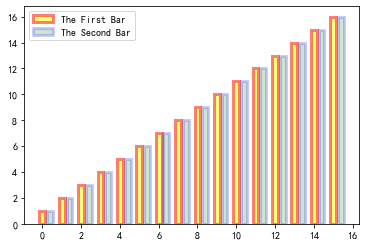

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei']
 
import matplotlib.pyplot as plt
y = range(1,17)
 
plt.bar(np.arange(16), y, alpha=0.5, width=0.3, color='yellow', edgecolor='red', label='The First Bar', lw=3)
plt.bar(np.arange(16)+0.4, y, alpha=0.2, width=0.3, color='green', edgecolor='blue', label='The Second Bar', lw=3)
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'This Is My Title')

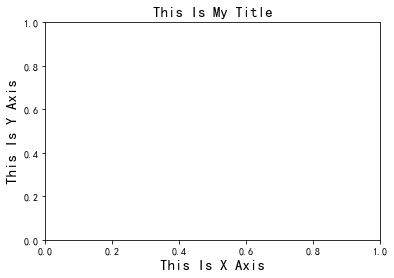

In [4]:
plt.xlabel('This Is X Axis', fontsize=15)
plt.ylabel('This Is Y Axis', fontsize=15)
plt.title('This Is My Title', fontsize=15)

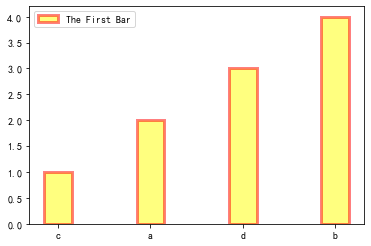

In [5]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei']
 
import matplotlib.pyplot as plt
 
x = ['c', 'a', 'd', 'b']
y = [1, 2, 3, 4]
 
plt.bar(x, y, alpha=0.5, width=0.3, color='yellow', edgecolor='red', label='The First Bar', lw=3)
plt.legend(loc='upper left')
 
plt.show()

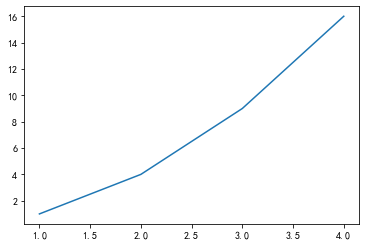

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

NameError: name 'N' is not defined

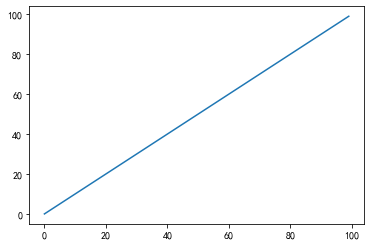

In [7]:
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot(range(100))

ymin, ymax = ax.get_ylim()
ax.set_yticks(np.round(np.linspace(ymin, ymax, N), 2))

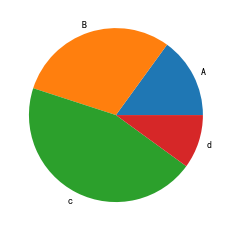

In [8]:
# 导入模块
import matplotlib.pyplot as plt

# 数据
labels = ["A", "B", "c", "d"]
fracs = [15, 30, 45, 10]


# 画图
plt.pie(x=fracs, labels=labels)

# 展示
plt.show()

In [110]:
data = {
    "fadf":['k','l','h'],
  "calories": ['420', '380', '390'],
  "duration": ['50', '40', '45']
}

df=pd.DataFrame(data)

df

,fadf,calories,duration
0,k,420,50
1,l,380,40
2,h,390,45


In [101]:
# 返回第一行
print(df.loc[0])
# 返回第二行
print(df.loc[1])

fadf          k
calories    420
duration     50
Name: 0, dtype: object
fadf          l
calories    380
duration     40
Name: 1, dtype: object


In [109]:
# def format(column):
#     tmp=[]
#     for ss in column:
#         ss=ss[:-1]
#         tmp.append(ss)
#     column=tmp
#     return column
# df=df.apply(format,axis=0)
# df.style.format({'calories':'{:0%}'})
df
def format2(colum):
    return  '{:.0%}'.format(colum.duration)
#     return colum.duration

df['duration']=df.apply(lambda x: format2(x),axis=1)
df

TypeError: unsupported format string passed to Series.__format__

In [135]:

def format1(column):
    return '{:.2}%'.format(column.score)
#     return round(column.score,1)+1


data={'name':['aa','bb','cc'],'score':['100','99','90'],'score1':[0.99,0.22,0.33]}

df=pd.DataFrame(data)
df

,name,score,score1
0,aa,100,0.99
1,bb,99,0.22
2,cc,90,0.33


In [127]:
df['score']=df.apply(lambda x: format1(x), axis=1)

In [128]:
df

,name,score
0,aa,10%
1,bb,99%
2,cc,90%


In [136]:
df.style.format({"score1":"{:.2%}"})
df

,name,score,score1
0,aa,100,0.99
1,bb,99,0.22
2,cc,90,0.33


In [ ]:
dd=pd.read_sql(""" SELECT t1.Date, 
CONCAT('$',FORMAT(t1.Gross,2)) AS Gross, 
CONCAT('$',FORMAT(t1.Net,2)) as Net, 
t1.Margin,
IFNULL(CONCAT((t1.Gross- t3.Gross)*100/t3.Gross,'%'),'0%') AS "D/D Gross"
FROM
(
SELECT date AS Date, SUM(cost + datacost + revenue) AS Gross,
SUM(revenue) AS Net,
CONCAT(SUM(revenue)*100/SUM(cost + datacost + revenue),'%') AS Margin
FROM fact_date_customer_campaign
GROUP BY date
) t1 LEFT JOIN 
(
SELECT distinct t.date,
(
SELECT MAX(date)
FROM
(SELECT DISTINCT date FROM fact_date_customer_campaign) tt
WHERE t.Date>tt.Date ) AS last_date
FROM
(SELECT DISTINCT date FROM fact_date_customer_campaign) t
) t2 ON t1.Date=t2.date
LEFT JOIN
(
SELECT date AS Date, SUM(cost + datacost + revenue) AS Gross,
SUM(revenue) AS Net,
CONCAT(SUM(revenue)*100/SUM(cost + datacost + revenue),'%') AS Margin
FROM fact_date_customer_campaign
GROUP BY date
) t3 ON t3.Date=t2.last_date """, con=conn)
# print(dd)



# dd["Margin"]*=100
# dd["D/D Gross"]*=100
# decimals=pd.Series([0,0],index=['Margin','D/D Gross'])
# df=dd.round(decimals)

# df['Margin']=df['Margin'].astype('int64').astype('str')+'%'
# df['D/D Gross']=df['D/D Gross'].astype('int64').astype('str')+'%'

# dd['Margin']='{:.0%}'.format(dd['Margin'])
dd['Margin']=dd['Margin'].astype('str')
# dd['Margin']=dd['Margin'][:-1]
# dd['D/D Gross']=dd['D/D Gross'].astype('str')[:-1]
# dd['Margin']=dd['Margin'].astype('int64')
# dd['D/D Gross']=dd['D/D Gross'].astype('int64')
# dd.style.format({'Margin':'{:.2%}','D/D Gross':'{:.2%}'})
# df
# print(dd['D/D Gross'])

tmp_margin=[]
for t in dd['Margin'].astype('str'):
    t=t[:-1]
    tmp_margin.append(t)
dd['Margin']=tmp_margin
tmp_gross=[]
for t in dd['D/D Gross'].astype('str'):
    t=t[:-1]
    tmp_gross.append(t)
dd['D/D Gross']=tmp_gross


def format1(column):
    return '{:.2}%'.format(column.Margin)

# def format2(column):
#     return '{:.2}%'.format(column.4)

dd['Margin']=dd.apply(lambda x: format1(x), axis=1)
# dd['D/D Gross']=dd.apply(lambda x :format2(x), axis=1)
    
# print(dd['Margin'])
# dd.style.format({'Margin':'{:.2%}','D/D Gross':'{:.2%}'})
dd